Confusion Matrix:
 [[ 1  1  3  1  0  0]
 [ 9  8  6  3  0  3]
 [ 1  5 41 16  7  2]
 [ 1  5 22 22 10  1]
 [ 0  2 13 10 19  3]
 [ 0  3  1  1  2  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.17      0.11         6
           1       0.33      0.28      0.30        29
           2       0.48      0.57      0.52        72
           3       0.42      0.36      0.39        61
           4       0.50      0.40      0.45        47
           5       0.31      0.36      0.33        11

    accuracy                           0.42       226
   macro avg       0.35      0.36      0.35       226
weighted avg       0.43      0.42      0.42       226


MSE: 86.06193880254804
RMSE: 9.276957410840478
MAPE: 0.5840478217840877
R2 Score: 0.8996044242088246


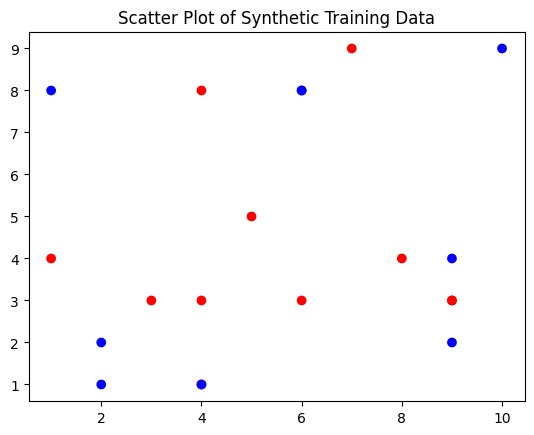

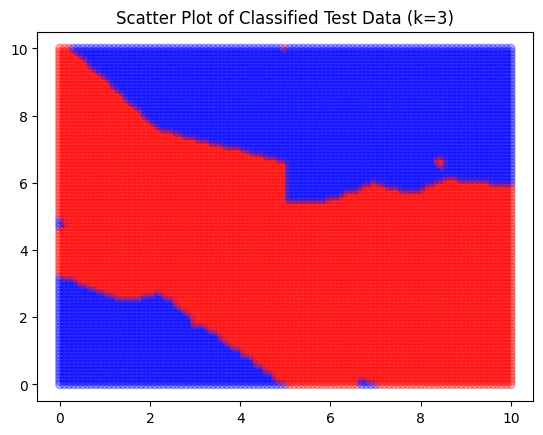

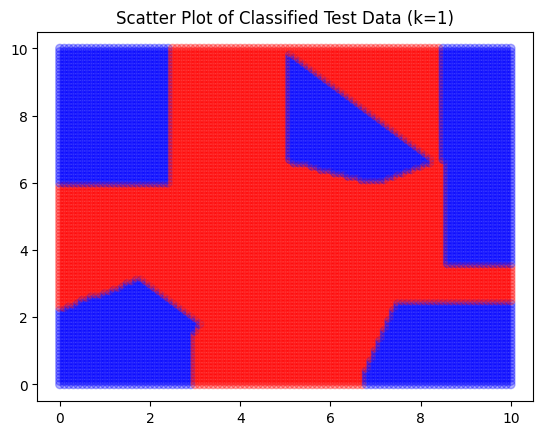

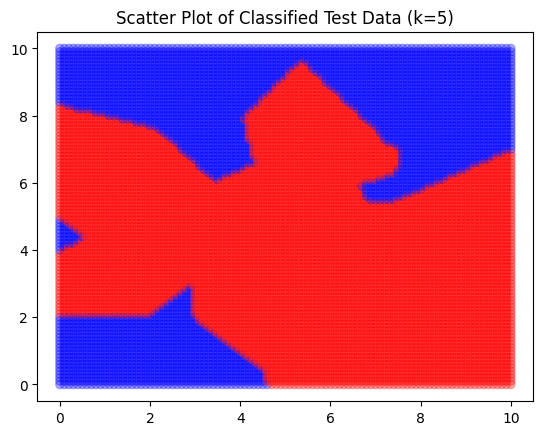

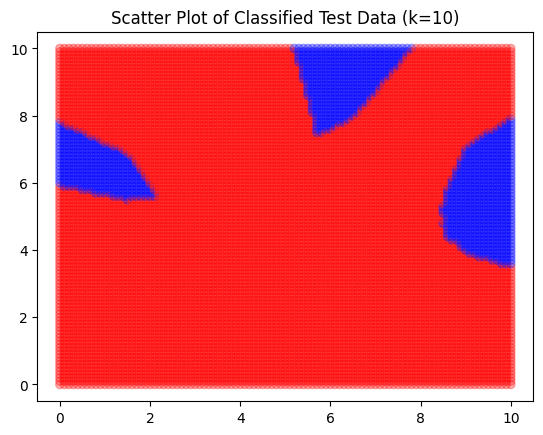

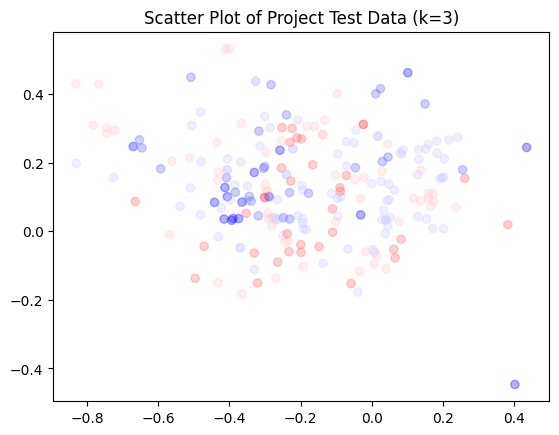

Best k value: 5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_percentage_error

# Load the dataset
df = pd.read_excel('training_mathbert.xlsx')
df['output'] = df['output'].astype(int)  # Convert target to integer

# Split the dataset
X = df.iloc[:, :-1]  # Features
y = df['output']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A1
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# A2
np.random.seed(42)
y_true = np.random.randint(0, 100, size=100)
y_pred_reg = y_true + np.random.normal(0, 10, size=100)
print(f"\nMSE: {mean_squared_error(y_true, y_pred_reg)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred_reg))}")
print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred_reg)}")
print(f"R2 Score: {r2_score(y_true, y_pred_reg)}")

# A3
X_train_synth = np.random.randint(1, 11, size=(20, 2))
y_train_synth = np.random.choice([0, 1], size=20)
plt.scatter(X_train_synth[:, 0], X_train_synth[:, 1], c=y_train_synth, cmap='bwr')
plt.title('Scatter Plot of Synthetic Training Data')
plt.show()

# A4
X_test_synth = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])
knn_synth = KNeighborsClassifier(n_neighbors=3)
knn_synth.fit(X_train_synth, y_train_synth)
y_test_synth_pred = knn_synth.predict(X_test_synth)
plt.scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=y_test_synth_pred, cmap='bwr', alpha=0.3)
plt.title('Scatter Plot of Classified Test Data (k=3)')
plt.show()

# A5
for k in [1, 5, 10]:
    knn_synth = KNeighborsClassifier(n_neighbors=k)
    knn_synth.fit(X_train_synth, y_train_synth)
    y_test_synth_pred = knn_synth.predict(X_test_synth)
    plt.scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=y_test_synth_pred, cmap='bwr', alpha=0.3)
    plt.title(f'Scatter Plot of Classified Test Data (k={k})')
    plt.show()

# A6
X_proj = df[['embed_0', 'embed_1']]
y_proj = df['output']
X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(X_proj, y_proj, test_size=0.2, random_state=42)
knn_proj = KNeighborsClassifier(n_neighbors=3)
knn_proj.fit(X_train_proj, y_train_proj)
y_test_proj_pred = knn_proj.predict(X_test_proj)
plt.scatter(X_test_proj['embed_0'], X_test_proj['embed_1'], c=y_test_proj_pred, cmap='bwr', alpha=0.3)
plt.title('Scatter Plot of Project Test Data (k=3)')
plt.show()

# A7
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_proj, y_train_proj)
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")